In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


여러 feature들을 이용해 Transported가 True인지 False인지 구분하는 분류(classification)인 모습을 확인할 수 있다.

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

(None, None)

In [5]:
# Cabin이 3가지 요소로 이루어짐을 확인할 수 있다. 이를 쪼개서 각각의 컬럼으로 만들어준다.
train[["Cabin1","Cabin2","Cabin3"]] = train["Cabin"].str.split("/",expand=True)
train.drop(columns="Cabin", inplace=True)
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [6]:
test[["Cabin1","Cabin2","Cabin3"]] = test["Cabin"].str.split("/",expand=True)
test.drop(columns="Cabin", inplace=True)
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin1,Cabin2,Cabin3
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [7]:
# 같은 행성사람들은 같은 이름을 쓸 확률이 높다고 판단해 HomePlanet결측치를 이름을 이용해 채워본다.
noHomePlanet = train[train["HomePlanet"].isna()]
noHomePlanet

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
59,0064_02,NaN,True,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,E,3,S
113,0119_01,NaN,False,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,A,0,P
186,0210_01,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,D,6,P
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,F,46,S
234,0251_01,NaN,True,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,C,11,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,E,582,P
8613,9194_01,NaN,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,E,603,S
8666,9248_01,NaN,False,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,F,1792,S
8674,9257_01,NaN,False,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,F,1892,P


In [8]:
yesHomePlanet = train[train["HomePlanet"].notnull()]
for name in noHomePlanet["Name"]:
    if not yesHomePlanet[yesHomePlanet["Name"]==name].empty:
        print(name)

In [9]:
# HomePlanet이 결측치인 사람들 중 HomePlanet 정보가 있는 사람들과 동명이인이 한명도 없다.

In [10]:
pd.set_option('display.max_columns', None)
train.groupby("HomePlanet").agg(["min","max","mean"])

C:\Users\신동혁\AppData\Local\Temp\ipykernel_15752\1090557854.py:2: FutureWarning: ['Destination', 'Name', 'Cabin1', 'Cabin2', 'Cabin3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  train.groupby("HomePlanet").agg(["min","max","mean"])


PassengerId               CryoSleep                  Age        \
                   min      max mean       min   max      mean  min   max   
HomePlanet                                                                  
Earth          0002_01  9279_01  inf     False  True  0.307932  0.0  79.0   
Europa         0001_01  9280_02  inf     False  True  0.439460  0.0  79.0   
Mars           0009_01  9251_01  inf     False  True  0.389860  0.0  76.0   

                         VIP                  RoomService           \
                 mean    min    max      mean         min      max   
HomePlanet                                                           
Earth       26.068232  False  False  0.000000         0.0   6256.0   
Europa      34.419664  False   True  0.062709         0.0  14327.0   
Mars        29.297203  False   True  0.036713         0.0   9920.0   

                       FoodCourt                       ShoppingMall           \
                  mean       min      max         mean          min      max   
HomePlanet                                                                     
Earth       136.940209       0.0   5412.0   137.228857          0.0   4581.0   
Europa      145.231981       0.0  29813.0  1503.212950          0.0  23492.0   
Mars        552.897272       0.0   6153.0    54.361999          0.0   7810.0   

                        Spa                      VRDeck                       \
                  mean  min      max        mean    min      max        mean   
HomePlanet                                                                     
Earth       133.872606  0.0   5577.0  142.781701    0.0   5321.0  138.132933   
Europa      151.132820  0.0  22408.0  848.055609    0.0  24133.0  875.765998   
Mars        308.445734  0.0   6011.0  110.221706    0.0   2336.0   47.440698   

           Transported                  
                   min   max      mean  
HomePlanet                              
Earth            False  True  0.423946  
Europa           False  True  0.658846  
Mars             False  True  0.523024

# 위 분석을 통해 알 수 있는 사실
1. 지구인은 VIP가 한명도 없다. 높은 확률로 유로파인이다.
2. RoomService는 화성인이 평균적으로 가장 높다.
3. FoodCourt, ShoppingMall, Spa, VRDeck은 유로파인이 평균적으로 가장 높다

In [11]:
train.groupby("Cabin1")["HomePlanet"].value_counts(normalize=True, dropna=False)

Cabin1  HomePlanet
A       Europa        0.984375
        NaN           0.015625
B       Europa        0.983312
        NaN           0.016688
C       Europa        0.982597
        NaN           0.017403
D       Mars          0.589958
        Europa        0.389121
        NaN           0.020921
E       Earth         0.450913
        Mars          0.376712
        Europa        0.146119
        NaN           0.026256
F       Earth         0.577666
        Mars          0.397280
        NaN           0.025054
G       Earth         0.976163
        NaN           0.023837
T       Europa        0.800000
        NaN           0.200000
Name: HomePlanet, dtype: float64

In [12]:
train.groupby("Cabin2")["HomePlanet"].value_counts(normalize=True, dropna=False)

Cabin2  HomePlanet
0       Earth         0.555556
        Europa        0.277778
        NaN           0.111111
        Mars          0.055556
1       Europa        0.600000
                        ...   
996     Earth         1.000000
997     Earth         1.000000
998     Earth         1.000000
999     Earth         0.833333
        Mars          0.166667
Name: HomePlanet, Length: 3217, dtype: float64

In [13]:
train.groupby("Cabin3")["HomePlanet"].value_counts(normalize=True, dropna=False)

Cabin3  HomePlanet
P       Earth         0.539705
        Europa        0.227057
        Mars          0.211127
        NaN           0.022111
S       Earth         0.521688
        Europa        0.260028
        Mars          0.194496
        NaN           0.023787
Name: HomePlanet, dtype: float64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Cabin1        8494 non-null   object 
 14  Cabin2        8494 non-null   object 
 15  Cabin3        8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


# 위 분석을 통해 알 수 있는 사실
4. Cabin1
A,B,C,T 는 높은 확률로 유로파인
G 는 높은 확률로 지구인

In [31]:
train.loc[(train["HomePlanet"].isnull()) & (train["Cabin1"]=="A"), "HomePlanet"]="Europa"
train.loc[(train["HomePlanet"].isnull()) & (train["Cabin1"]=="B"), "HomePlanet"]="Europa"
train.loc[(train["HomePlanet"].isnull()) & (train["Cabin1"]=="C"), "HomePlanet"]="Europa"
train.loc[(train["HomePlanet"].isnull()) & (train["Cabin1"]=="T"), "HomePlanet"]="Europa"

train.loc[(train["HomePlanet"].isnull()) & (train["Cabin1"]=="G"), "HomePlanet"]="Earth"

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8584 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Cabin1        8494 non-null   object 
 14  Cabin2        8494 non-null   object 
 15  Cabin3        8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


아직도 HomePlanet이 결측치인 값들이 많이 존재

In [33]:
train[train["HomePlanet"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
59,0064_02,NaN,True,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,E,3,S
186,0210_01,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,D,6,P
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,F,46,S
291,0321_01,NaN,False,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,F,61,S
365,0402_01,NaN,True,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,True,D,15,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,9072_01,NaN,True,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,True,F,1758,S
8515,9084_01,NaN,False,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,E,582,P
8613,9194_01,NaN,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,E,603,S
8666,9248_01,NaN,False,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,F,1792,S


지구인은 VIP가 한명도 없다. 높은 확률로 유로파인이다.          
RoomService는 화성인이 평균적으로 가장 높다.          
FoodCourt, ShoppingMall, Spa, VRDeck은 유로파인이 평균적으로 가장 높다           
위에서 분석한 내용으로 모두 추측해본다.

In [39]:
VIP_data = train.groupby("HomePlanet")["VIP"].value_counts()
RoomService_data = train.groupby("HomePlanet")["RoomService"].value_counts()
FoodCourt_data = train.groupby("HomePlanet")["FoodCourt"].value_counts()
ShoppingMall_data = train.groupby("HomePlanet")["ShoppingMall"].value_counts()
Spa_data = train.groupby("HomePlanet")["Spa"].value_counts()
VRDeck_data = train.groupby("HomePlanet")["VRDeck"].value_counts()

([<matplotlib.patches.Wedge at 0x113240ac1c0>,
 [Text(1.1, 0.0, 'True'), Text(-1.1, 1.3471114790620887e-16, 'False')],
 [Text(0.6, 0.0, '0.0%'), Text(-0.6, 7.347880794884119e-17, '100.0%')])

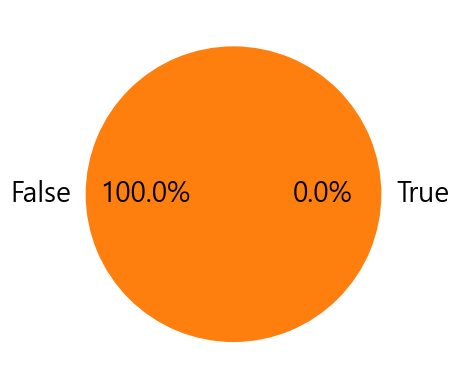

In [64]:
import matplotlib.pyplot as plt

values = [len(train[(train["HomePlanet"]=="Earth")&(train["VIP"]==True)]), len(train[(train["HomePlanet"]=="Earth")&(train["VIP"]==False)])]
plt.pie(values,labels=["True","False"], autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x113240ee040>,
 [Text(1.0793381601807044, 0.21220069740161665, 'True'),
  Text(-1.079338147763413, -0.2122007605609486, 'False')],
 [Text(0.5887299055531113, 0.11574583494633633, '6.2%'),
  Text(-0.5887298987800434, -0.11574586939688104, '93.8%')])

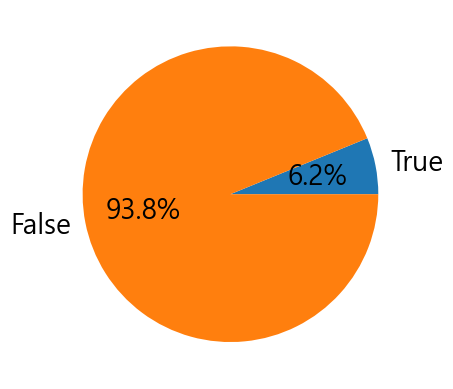

In [65]:
values = [len(train[(train["HomePlanet"]=="Europa")&(train["VIP"]==True)]), len(train[(train["HomePlanet"]=="Europa")&(train["VIP"]==False)])]
plt.pie(values,labels=["True","False"],autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x11324138250>,
 [Text(1.0926915130177224, 0.12659090559373107, 'True'),
  Text(-1.092691518943869, -0.12659085444114956, 'False')],
 [Text(0.5960135525551212, 0.06904958486930785, '3.7%'),
  Text(-0.5960135557875649, -0.06904955696789976, '96.3%')])

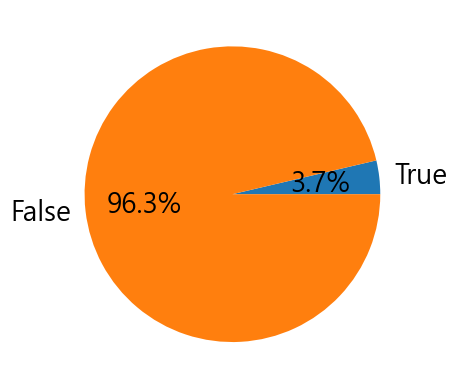

In [66]:
values = [len(train[(train["HomePlanet"]=="Mars")&(train["VIP"]==True)]), len(train[(train["HomePlanet"]=="Mars")&(train["VIP"]==False)])]
plt.pie(values,labels=["True","False"],autopct='%.1f%%')

<AxesSubplot:xlabel='HomePlanet,RoomService'>

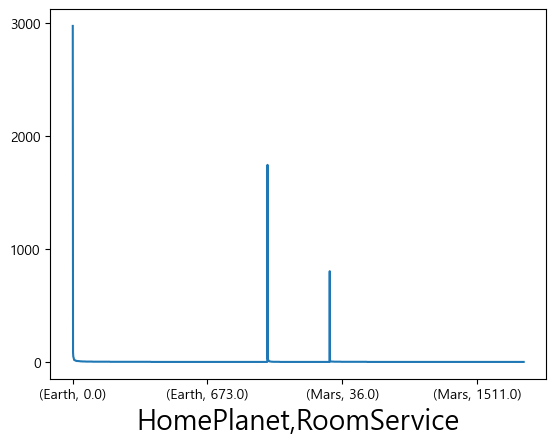

In [45]:
RoomService_data.plot(fontsize=10)

# 데이터 전처리
1. 먼저 필요없는 feature들은 없에준다.

In [48]:
# 굳이 필요없는 데이터라고 생각되면 해당 feature를 삭제한다.
train = train.drop(columns=["PassengerId",
                           "Cabin",
                           "Name"])

# 데이터 전처리
1. 결측치
데이터는 총 8693개 있는데 결측치가 없는 feature는 PassengerId밖에 존재하지 않는다. 만약 결측치를 모두 지워도 전체 데이터가 많이 존재한다면 문제가 없을 수 있다.

In [49]:
# 결측치 모두 지워보기
train = train.dropna(axis=0)
train.shape

(6923, 11)

결측치가 존재하는 데이터를 모두 지웠더니 20%정도 소실됨

In [51]:
6923/8693*100

79.63878983089843

일단 완전한 데이터만 가지고 train 진행해본다.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6923 non-null   object 
 1   CryoSleep     6923 non-null   object 
 2   Destination   6923 non-null   object 
 3   Age           6923 non-null   float64
 4   VIP           6923 non-null   object 
 5   RoomService   6923 non-null   float64
 6   FoodCourt     6923 non-null   float64
 7   ShoppingMall  6923 non-null   float64
 8   Spa           6923 non-null   float64
 9   VRDeck        6923 non-null   float64
 10  Transported   6923 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 601.7+ KB


# 데이터 전처리
2. 이상치 데이터를 찾아본다.

In [53]:
columns = train.columns
for column in columns:
    print(column,"----------------------------------------------------------------------------")
    print(train[column].value_counts(normalize=True, ascending=True))

HomePlanet ----------------------------------------------------------------------------
Mars      0.205691
Europa    0.254658
Earth     0.539650
Name: HomePlanet, dtype: float64
CryoSleep ----------------------------------------------------------------------------
True     0.353748
False    0.646252
Name: CryoSleep, dtype: float64
Destination ----------------------------------------------------------------------------
PSO J318.5-22    0.094612
55 Cancri e      0.214069
TRAPPIST-1e      0.691319
Name: Destination, dtype: float64
Age ----------------------------------------------------------------------------
77.0    0.000144
79.0    0.000289
76.0    0.000289
75.0    0.000433
72.0    0.000433
          ...   
19.0    0.033511
21.0    0.034667
22.0    0.035100
18.0    0.038423
24.0    0.039145
Name: Age, Length: 80, dtype: float64
VIP ----------------------------------------------------------------------------
True     0.024411
False    0.975589
Name: VIP, dtype: float64
RoomService -----

이상치로 보이는 내용은 없다.

# 데이터 전처리
3. 연속형 데이터 처리와 범주형 데이터 처리를 해준다.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
float_columns = train.dtypes[train.dtypes=="float64"].index

for column in float_columns:
    print(column)
    a = pd.DataFrame(train[column])
    train[column] = scaler.fit_transform(a)

train

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,0.696478,False,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
1,Earth,False,TRAPPIST-1e,-0.337043,False,-0.173745,-0.281849,-0.243585,0.199122,-0.230830,True
2,Europa,False,TRAPPIST-1e,2.005605,True,-0.271688,1.850701,-0.283044,5.518474,-0.226387,False
3,Europa,False,TRAPPIST-1e,0.283070,False,-0.335500,0.479819,0.302527,2.597403,-0.098429,False
4,Earth,False,TRAPPIST-1e,-0.888254,False,0.114149,-0.245379,-0.044712,0.212925,-0.268151,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.834281,True,-0.335500,3.789546,-0.283044,1.142906,-0.204172,False
8689,Earth,True,PSO J318.5-22,-0.750451,False,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
8690,Earth,False,TRAPPIST-1e,-0.199240,False,-0.335500,-0.287229,2.671645,-0.273633,-0.269928,True
8691,Europa,False,55 Cancri e,0.214169,False,-0.335500,0.339921,-0.283044,0.030035,2.604689,False


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = train.dtypes[train.dtypes=="object"].index

for column in object_columns:
    print(column)
    a = pd.DataFrame(train[column])
    train[column] = le.fit_transform(a)

train

HomePlanet
CryoSleep
Destination
VIP


C:\anaconda\envs\da\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,0.696478,0,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
1,0,0,2,-0.337043,0,-0.173745,-0.281849,-0.243585,0.199122,-0.230830,True
2,1,0,2,2.005605,1,-0.271688,1.850701,-0.283044,5.518474,-0.226387,False
3,1,0,2,0.283070,0,-0.335500,0.479819,0.302527,2.597403,-0.098429,False
4,0,0,2,-0.888254,0,0.114149,-0.245379,-0.044712,0.212925,-0.268151,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.834281,1,-0.335500,3.789546,-0.283044,1.142906,-0.204172,False
8689,0,1,1,-0.750451,0,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
8690,0,0,2,-0.199240,0,-0.335500,-0.287229,2.671645,-0.273633,-0.269928,True
8691,1,0,0,0.214169,0,-0.335500,0.339921,-0.283044,0.030035,2.604689,False


In [57]:
y_train = train["Transported"]
X_train = train.drop(columns="Transported")
X_train, y_train

(      HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  \
 0              1          0            2  0.696478    0    -0.335500   
 1              0          0            2 -0.337043    0    -0.173745   
 2              1          0            2  2.005605    1    -0.271688   
 3              1          0            2  0.283070    0    -0.335500   
 4              0          0            2 -0.888254    0     0.114149   
 ...          ...        ...          ...       ...  ...          ...   
 8688           1          0            0  0.834281    1    -0.335500   
 8689           0          1            1 -0.750451    0    -0.335500   
 8690           0          0            2 -0.199240    0    -0.335500   
 8691           1          0            0  0.214169    0    -0.335500   
 8692           1          0            2  1.040985    0    -0.148517   
 
       FoodCourt  ShoppingMall       Spa    VRDeck  
 0     -0.287229     -0.283044 -0.274495 -0.269928  
 1     -0.281849

# 모델 생성 및 학습

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params ={
    "max_depth":[3,6,9,12,15]
}
params2 = {
    "kernel":["linear","rbf"],
    "C":[0.001, 0.01, 0.1, 1, 10, 100],
    "gamma":[0.001, 0.01, 0.1, 1, 10, 100],
}

tree = DecisionTreeClassifier(random_state=0)
forest = RandomForestClassifier(random_state=0)
svc = SVC(random_state=0)

gs_tree = GridSearchCV(tree,
                       param_grid=params,
                       scoring="accuracy",
                       cv=4,
                       n_jobs=-1
                 )
gs_forest = GridSearchCV(forest,
                       param_grid=params,
                       scoring="accuracy",
                       cv=4,
                       n_jobs=-1
                 )
gs_svc = GridSearchCV(svc,
                      param_grid=params2,
                      scoring="accuracy",
                      cv=4,
                      n_jobs=-1
)

In [76]:
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15]}, scoring='accuracy')

In [77]:
gs_forest.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15]}, scoring='accuracy')

In [73]:
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [78]:
gs_tree.best_score_, gs_forest.best_score_, gs_svc.best_score_

(0.780588002524519, 0.7986440728904739, 0.7921444385449956)

In [80]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,0.696478,0,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
1,0,0,2,-0.337043,0,-0.173745,-0.281849,-0.243585,0.199122,-0.230830,True
2,1,0,2,2.005605,1,-0.271688,1.850701,-0.283044,5.518474,-0.226387,False
3,1,0,2,0.283070,0,-0.335500,0.479819,0.302527,2.597403,-0.098429,False
4,0,0,2,-0.888254,0,0.114149,-0.245379,-0.044712,0.212925,-0.268151,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.834281,1,-0.335500,3.789546,-0.283044,1.142906,-0.204172,False
8689,0,1,1,-0.750451,0,-0.335500,-0.287229,-0.283044,-0.274495,-0.269928,False
8690,0,0,2,-0.199240,0,-0.335500,-0.287229,2.671645,-0.273633,-0.269928,True
8691,1,0,0,0.214169,0,-0.335500,0.339921,-0.283044,0.030035,2.604689,False


In [81]:
test = test.drop(columns=["PassengerId",
                           "Cabin",
                           "Name"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
